In [2]:
from ecell4 import *
%matplotlib inline
import numpy as np
import math
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

(0, 1.0)

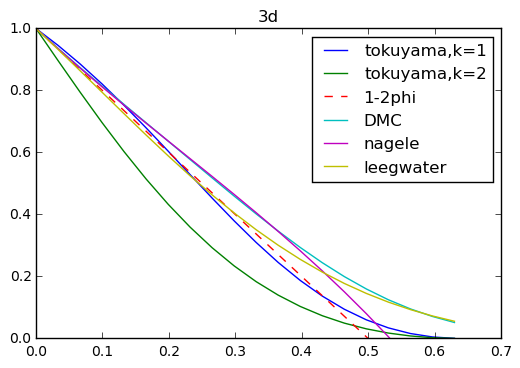

In [75]:
def Dt(phi,k,phic):
    x = phi/phic
    return 1./(1+(k*x/(1-x)/(1-x)))

def leegD(phi):
    g = [(1-0.5*p)/((1-p)**3) for p in phi]
    return 1./(1+2*phi*g)

def DMC(phi):
    return [math.exp(-2*p-(6.83*(p**3))) for p in phi]

def nagele(phi):
    return [1-(2*p) +(1.272*p*p) -(1.951*p**3) for p in phi]

for k in [1,2]:
    phic=0.64
    phi = np.linspace(0,phic-0.01,20)
    plt.plot(phi,Dt(phi,k,phic),'-',label='tokuyama,k='+str(k))
plt.plot(phi,[1.-2.*p for p in phi],'--',label='1-2phi')
plt.plot(phi,DMC(phi),'-',label='DMC')
plt.plot(phi,nagele(phi),'-',label='nagele')
plt.plot(phi,leegD(phi),'-',label='leegwater')
plt.legend()
plt.title('3d')
plt.ylim(0,1.)

[ 1.    0.75]


(0, 1)

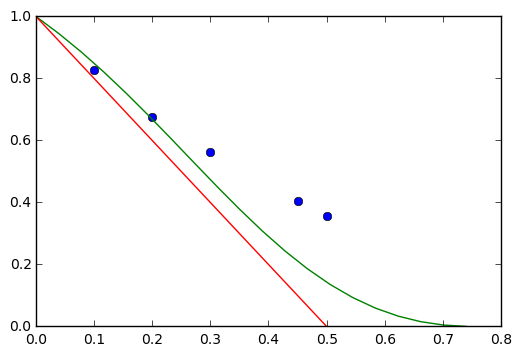

In [55]:
phiN25=[0.1, 0.2, 0.3, 0.45, 0.5]
deN25 = [0.82856337163239302, 0.67611310436687866, 0.56194165749041713, 0.40482004779724923, 0.3559072650089678]
d1,d2 = curve_fit(Dt,phiN25,deN25,check_finite=True,bounds=([1.,0.5],[1.1,0.75]))
print d1
plt.plot(phiN25,deN25,'o',label='sim')
phi=np.linspace(0,d1[1]-0.01,20)
plt.plot(phi,Dt(phi,d1[0],d1[1]),'-',label='fitting')
plt.plot(phi,[1.-2.*p for p in phi],'-',label='1-2phi')
plt.ylim(0,1)

to,msdto 0.000119645962956 0.000281471696385


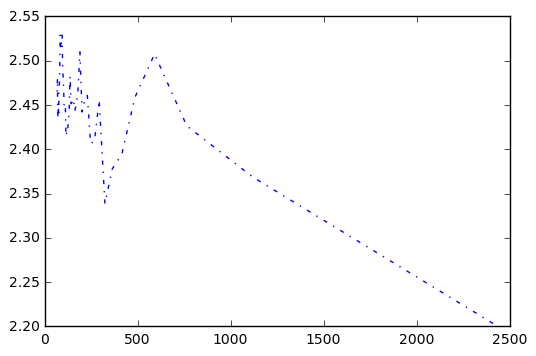

In [16]:
def lin(x,m,c): 
    return m*x+c
phi=0.3 
Do = 1. 
dat = np.loadtxt('data/2Dcrowding_N25BDmocN25phi'+str(phi)+'.csv',delimiter=',')
msd = dat[:,1][1:] 
t = dat[:,0][1:]


In [ ]:
#plt.plot(t,msd,'.') 
intt = 1e-4
tmol = 5e-5
index = len([k for k in t if k<=intt])
tmoli = 0#len([k for k in t if k<=tmol])
to= t[index] 
msdto = msd[index] 
print "to,msdto",to,msdto 
R = [(j-msdto)/(i-to) for i,j in zip(t[tmoli:],msd[tmoli:]) if (i!=to)] 
x = [math.log(i/to)/(i-to) for i in t[tmoli:] if (i!=to)] 

#index = len([k for k in x if k>=1.5e5])
#c1,c2 = curve_fit(lin,x[:index],R[:index])
#print c1
#print c2
#plt.plot(x[:index],R[:index],'ro') 
plt.plot(x[-50:],R[-50:],'-.')
#plt.semilogy([i for i in t if (i!=tmol)],R,'.')
#plt.plot(x,[c1[0]*i+c1[1] for i in x])
#Def = c1[1]
#taul= c1[0]/(Do-Def)
#print "Def,taul",Def,taul

In [3]:
def msdfit(tt,taum,B):
    return [Def*t+((Do-Def)*taul*math.log(t/taum))+B for t in tt]

d1,d2 = curve_fit(msdfit,t[1:],msd[1:],check_finite=True,bounds=([0,-np.inf],[np.inf,np.inf]))
taum = d1[0]
B = d1[1]
print "taum,B",taum,B
plt.plot(t,msd,'.')
fitmsd = msdfit(t[1:],taum,B)
#plt.plot(t[1:],fitmsd)


NameError: global name 'Def' is not defined

0.346514639859
0.236701783089
0.175838227698
0.154506076825
[0.84976487518115462, 0.58371924115249352, 0.43443111395969336, 0.38494498746001471]


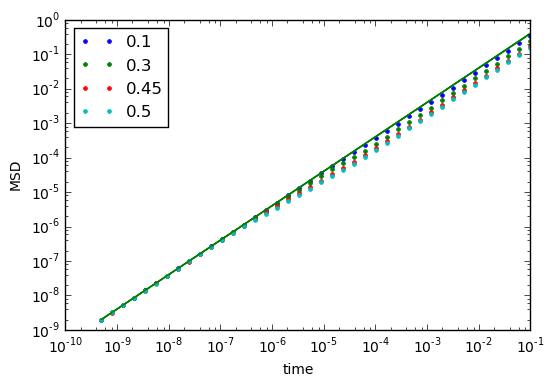

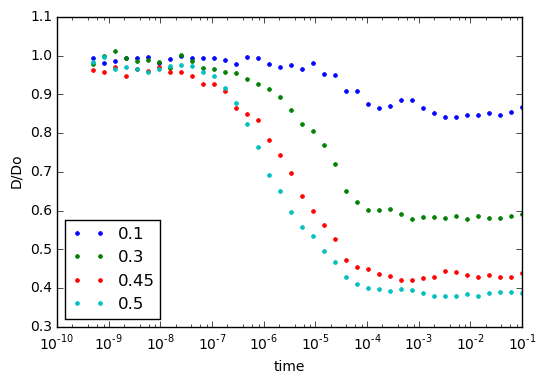

In [20]:
f1,ax1 = plt.subplots(1)
f2,ax2 = plt.subplots(1)

phis = [0.1,0.3,0.45,0.5]

def plotmsd(phi):
    dat = np.loadtxt('data/2Dcrowding_BDmocphi'+str(phi)+'.csv',delimiter=',')   
    msd = dat[:,1]
    print msd[-1]
    t = dat[:,0]
    ax1.loglog(t,msd,'.',label=str(phi))
    D = 1.
    ax1.plot(t,4*D*t,'g-')
    Dt = msd[1:]/t[1:]/4./D
    ax2.semilogx(t[1:],Dt,'.',label=str(phi))
    deff = Dt[(t>3e-3)[1::]]
    return np.mean(deff)

de = []
for p in phis:
    mean = plotmsd(p)
    de.append(mean)
    ax1.set_xlabel("time")
    ax1.set_ylabel("MSD")  
    ymin = 0.3
    ymax = 1.1
    ax2.set_ylim(ymin,ymax)
    #ax2.set_yticks(np.arange(ymin,ymax,0.1))
    ax2.set_xlabel("time")
    ax2.set_ylabel("D/Do")    
    ax1.legend(loc='best')
    ax2.legend(loc='best')  
print de

In [21]:
f1.savefig("figure/2DBDmobileN5_MSD_t.png",format='png',dpi=100)    
f2.savefig("figure/2DBDmobileN5_Deff_t.png",format='png',dpi=100)

In [14]:
phis.insert(0,0.0)
de.insert(0,1.)
print phis
print de


[0.0, 0.1, 0.2, 0.3, 0.45, 0.5]
[1.0, 0.82856337163239302, 0.67611310436687866, 0.56194165749041713, 0.40482004779724923, 0.3559072650089678]


phi [0.0, 0.1, 0.2, 0.3, 0.45, 0.5]
Deff [1.0, 0.82856337163239302, 0.67611310436687866, 0.56194165749041713, 0.40482004779724923, 0.3559072650089678]


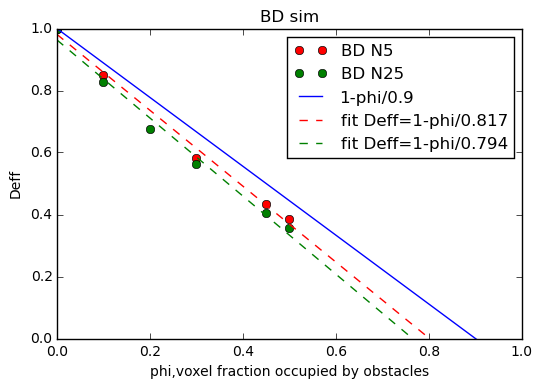

In [19]:
import scipy
from scipy.optimize import curve_fit
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt

phiN5 = [0.0, 0.1, 0.3, 0.45, 0.5]
deN5 = [1.0, 0.84976487518115462, 0.58371924115249352, 0.43443111395969336, 0.38494498746001471]
phiN25=[0.0, 0.1, 0.2, 0.3, 0.45, 0.5]
deN25 = [1.0, 0.82856337163239302, 0.67611310436687866, 0.56194165749041713, 0.40482004779724923, 0.3559072650089678]


def lin(x,m,c):
    return m*x+c 
plt.plot(phiN5,deN5,'ro',label='BD N5')
plt.plot(phiN25,deN25,'go',label='BD N25')
xx = np.linspace(0.0,1.,10)
plt.plot(xx,[1-y/0.9 for y in xx],label='1-phi/0.9')
c1,c2 = curve_fit(lin,phiN5,deN5)
plt.plot(xx,[c1[0]*i+c1[1] for i in xx],'r--',label='fit Deff=1-phi/{:.3f}'.format(-1./c1[0]))
c1,c2 = curve_fit(lin,phiN25,deN25)
plt.plot(xx,[c1[0]*i+c1[1] for i in xx],'g--',label='fit Deff=1-phi/{:.3f}'.format(-1./c1[0]))
#plt.plot(xx,[(-1./0.18)*i+1. for i in xx],'--',label='Deff=1-5.55phi')
plt.title('BD sim')
plt.xlabel('phi,voxel fraction occupied by obstacles')
plt.ylabel('Deff')
#plt.xlim(0,0.5)
plt.ylim(0.0,1)
plt.legend()
print 'phi',phis
print 'Deff',de
#print 'phic=',-1./slope
#plt.savefig("figure/2DBD_diffusion_Deff_phi.png",format='png',dpi=100)
plt.show()

In [ ]:
f2,ax2 = plt.subplots(1)

phis = [0.0,0.05,0.1,0.18]
def plotmsd1(phi):
    dat = np.loadtxt('data/2Dcrowding_BD_phi'+str(phi)+'_run1.csv',delimiter=',')   
    msd = dat[:,1]
    t = dat[:,0]
    D = 1
    Dt = msd[1:]/t[1:]/4./D
    ax2.loglog(t[1:],Dt,'--',color=c,label=str(phi))
    return 

def plotmsd2(phi):
    dat = np.loadtxt('data/2Dcrowding_BD_phi'+str(phi)+'_run2.csv',delimiter=',')   
    msd = dat[:,1]
    t = dat[:,0]
    D = 1
    Dt = msd[1:]/t[1:]/4./D
    ax2.loglog(t[1:],Dt,'-',color=c)
    return 

de = []
clrs = ['r','g','k','b']
for p,c in zip(phis,clrs):
    plotmsd1(p)
    plotmsd2(p)
    
ymin = 0.02
ymax = 1.2
ax2.set_ylim(ymin,ymax)
#ax2.set_yticks(np.arange(ymin,ymax,0.1))
ax2.set_xlabel("time")
ax2.set_ylabel("D/Do")    
ax2.legend(loc='best')  

In [ ]:
# 